In [1]:
# 필요한 기본 패키지 준비
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

%matplotlib inline
from plotnine import *
import folium
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import datetime as dt

# 한글 처리
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumGothicCoding.ttf').get_name()
rc('font',family=font_name)

# - 마이너스 사인 처리
matplotlib.rcParams['axes.unicode_minus'] = False

# jupyter notebook에서 warning 무시하기
import warnings
warnings.filterwarnings("ignore")

In [76]:
gs_total = pd.read_csv('d:/project/contest/data/processed/gs_total.csv')
lavla_total = pd.read_csv('d:/project/contest/data/processed/lavla_total.csv')

In [34]:
gs_total.head()

,pvn_nm,bor_nm,sale_dt,gender,age_cd,gender_age,category,qty,year,month,day,date,weekday,nth_week,season
0,서울특별시,종로구,20160101,F,1,F1,라면,7,2016,1,1,2016-01-01,4,53,겨울
1,서울특별시,종로구,20160101,F,2,F2,과자,655,2016,1,1,2016-01-01,4,53,겨울
2,서울특별시,종로구,20160101,F,2,F2,라면,282,2016,1,1,2016-01-01,4,53,겨울
3,서울특별시,종로구,20160101,F,2,F2,마스크,35,2016,1,1,2016-01-01,4,53,겨울
4,서울특별시,종로구,20160101,F,2,F2,맥주,183,2016,1,1,2016-01-01,4,53,겨울


# 전체 월별 GS편의점 판매량 분석결과
1. 7월
2. 8월
3. 6월
4. 5월
5. 9월
6. 4월

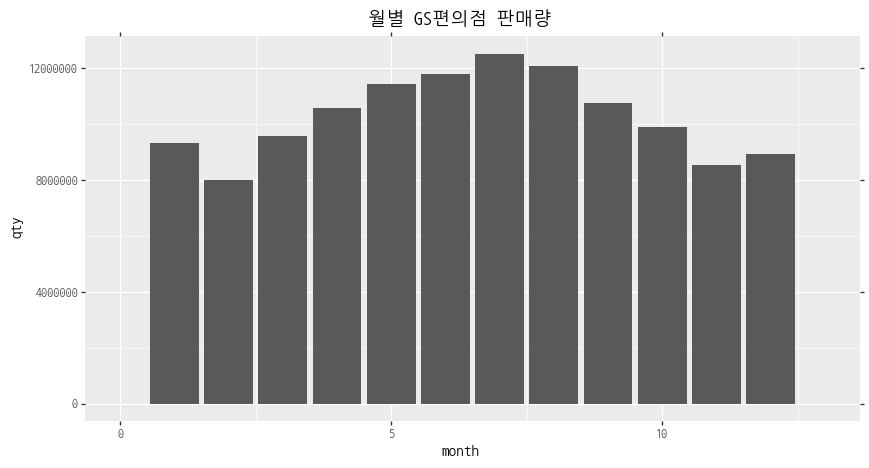

<ggplot: (-9223371905024778766)>

In [38]:
( 
ggplot(gs_total)
+ aes(x='month', y="qty")
+ xlim(0,13)
+ geom_bar(stat='identity')
+ ggtitle('월별 GS편의점 판매량')
+ theme(text=element_text(family='NanumGothicCoding'), figure_size = (10,5))
)

# 지역별 GS편의점 판매량 분석결과 
1. 강남구 
2. 관악구
3. 마포구
4. 서초구
5. 영등포구
6. 서대문구 

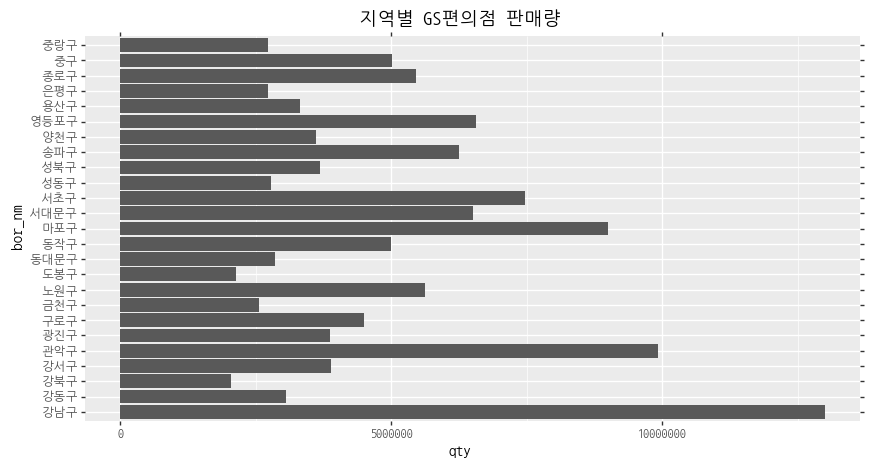

<ggplot: (131830308535)>

In [32]:
( 
ggplot(gs_total)
+ aes(x='bor_nm', y="qty")
+ geom_bar(stat='identity')
+ coord_flip()
+ ggtitle('지역별 GS편의점 판매량')
+ theme(text=element_text(family='NanumGothicCoding'), figure_size = (10,5))
)

# 월별 카테고리별 GS편의점 판매량 분석결과 
1. 과자 (5월)
2. 라면 (7월)
3. 생수 (3월 ~ 4월, 12월)
4. 탄산음료 (8월 ~ 9월)
5. 아이스크림 (5월 ~ 8월)

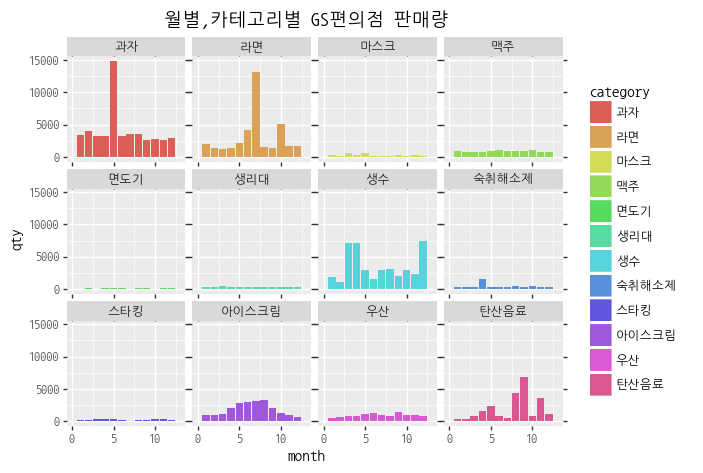

<ggplot: (-9223371905107177454)>

In [42]:
(ggplot(gs_total, aes(x='month',y='qty',fill='category'))
+ geom_bar(stat='identity',position='dodge')
+ ggtitle('월별,카테고리별 GS편의점 판매량')
+ facet_wrap('category')
# + theme(text=element_text(family='NanumGothicCoding'), figure_size = (10,5))
+ theme(text=element_text(family='NanumGothicCoding'))
+ xlim(0,13)
)

# 연령별,카테고리별 GS마트 판매량
1. 0 ~ 19   
2. 20 ~ 39 (생수, 숙취해소제, 맥주, 아이스크림)
3. 40 ~ 59 (과자, 라면, 탄산음료)
4. 60 ~ 99

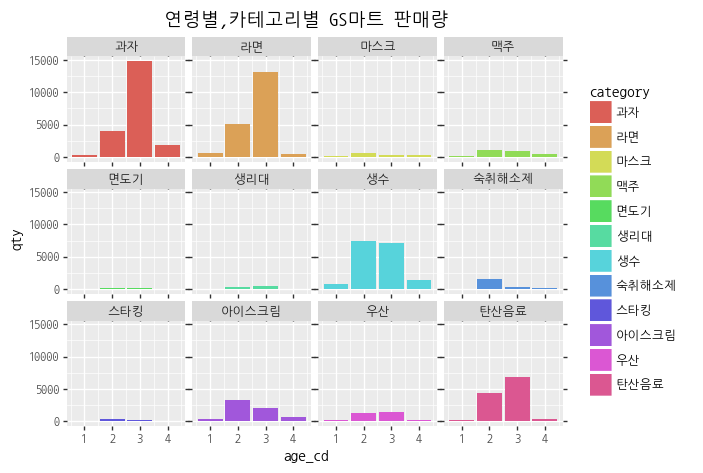

<ggplot: (-9223371905107176581)>

In [43]:
(ggplot(gs_total, aes(x='age_cd',y='qty',fill='category'))
+ geom_bar(stat='identity',position='dodge')
+ ggtitle('연령별,카테고리별 GS마트 판매량')
+ facet_wrap('category')
# + theme(text=element_text(family='NanumGothicCoding'), figure_size = (10,5))
+ theme(text=element_text(family='NanumGothicCoding'))
)

# 성별,카테고리별 GS마트 판매량
1. 남성 (과자, 생수, 숙취해소제, 탄산음료 )
2. 여성 (라면, 아이스크림 )

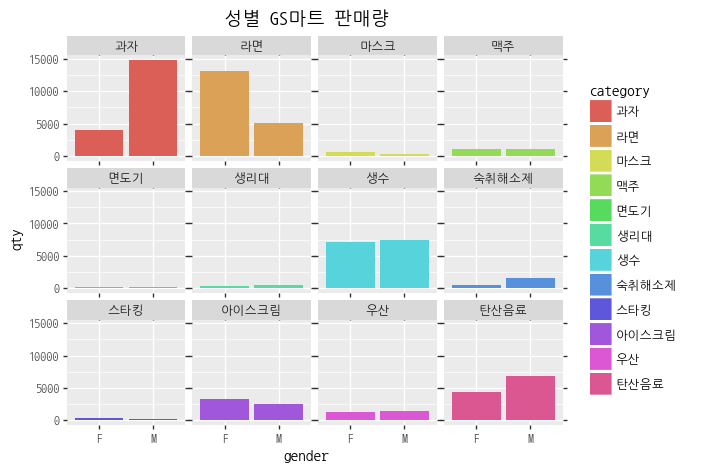

<ggplot: (-9223371905176912966)>

In [47]:
(ggplot(gs_total, aes(x='gender',y='qty',fill='category'))
+ geom_bar(stat='identity',position='dodge')
+ ggtitle('성별 GS마트 판매량')
+ facet_wrap('category')
# + theme(text=element_text(family='NanumGothicCoding'), figure_size = (10,5))
+ theme(text=element_text(family='NanumGothicCoding'))
)

# ======================= Top 분류 Tail ==========================

In [41]:
# 판매량이 많은 과자,라면,생수,아이스크림,탄산음료 분석
gs_total_top5 = gs_total[(gs_total['category']=='과자')
                               | (gs_total['category']== '라면')
                               | (gs_total['category']== '생수')
                               | (gs_total['category']== '아이스크림')
                               | (gs_total['category']== '탄산음료')]

In [44]:
# 판매량이 적은 마스크,맥주,면도기,생리대, 숙취해소제, 스타킹, 우산  분석
gs_total_tail7 = gs_total[(gs_total['category']=='마스크')
                               | (gs_total['category']== '맥주')
                               | (gs_total['category']== '면도기')
                               | (gs_total['category']== '생리대')
                               | (gs_total['category']== '숙취해소제')
                               | (gs_total['category']== '스타킹')
                               | (gs_total['category']== '우산')]

# 월별 카테고리별 GS편의점 tail7 판매량 분석결과
1. 마스크 (3월, 5월)
2. 맥주 (6월 ~ 10월)
3. 숙취해소제 (4월)
4. 우산 (5월 ~ 7월, 9월 ~ 10월)

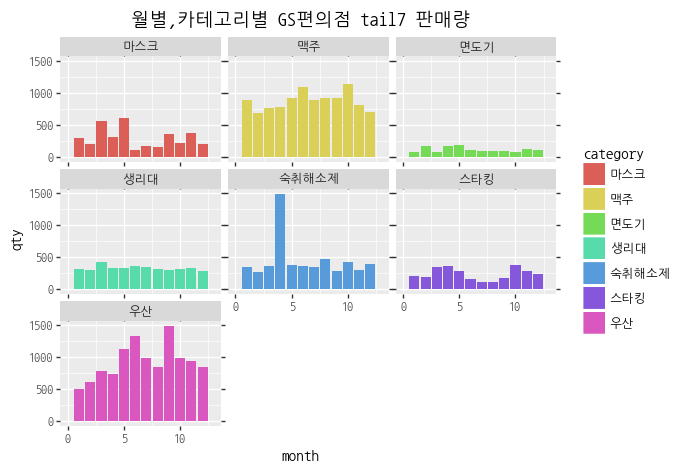

<ggplot: (131678143545)>

In [46]:
(ggplot(gs_total_tail7, aes(x='month',y='qty',fill='category'))
+ geom_bar(stat='identity',position='dodge')
+ ggtitle('월별,카테고리별 GS편의점 tail7 판매량')
+ facet_wrap('category')
# + theme(text=element_text(family='NanumGothicCoding'), figure_size = (10,5))
+ theme(text=element_text(family='NanumGothicCoding'))
+ xlim(0,13)
)

# 연령별 카테고리별 GS편의점 tail7 판매량 분석결과
1. 0 ~ 19   
2. 20 ~ 39 (마스크, 맥주, 면도기, 숙취해소제, 스타킹)
3. 40 ~ 59 (생리대, 우산)
4. 60 ~ 99

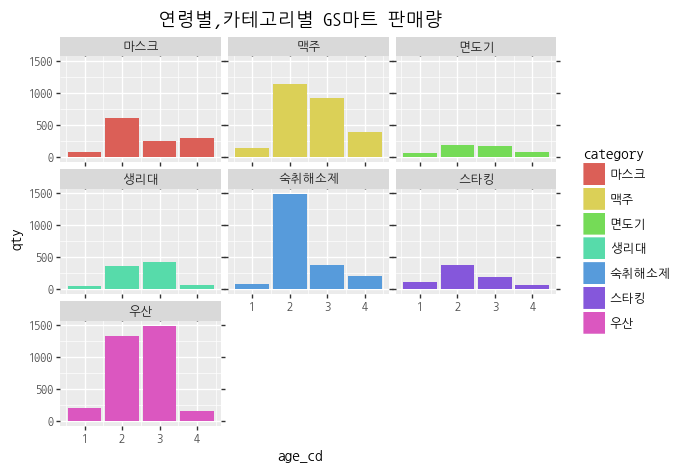

<ggplot: (-9223371905161810516)>

In [49]:
(ggplot(gs_total_tail7, aes(x='age_cd',y='qty',fill='category'))
+ geom_bar(stat='identity',position='dodge')
+ ggtitle('연령별,카테고리별 GS마트 판매량')
+ facet_wrap('category')
# + theme(text=element_text(family='NanumGothicCoding'), figure_size = (10,5))
+ theme(text=element_text(family='NanumGothicCoding'))
)

# 성별 카테고리별 GS편의점 tail7 판매량 분석결과
1. 남성(맥주, 면도기, 생리대, 우산)
2. 여성(마스크, 스타킹)

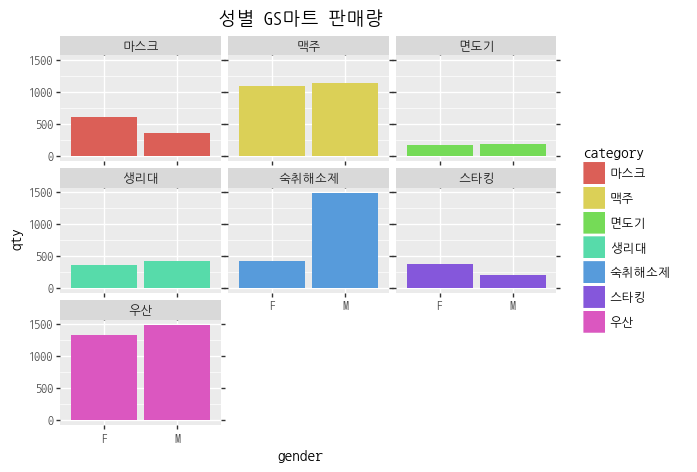

<ggplot: (-9223371905160655030)>

In [48]:
(ggplot(gs_total_tail7, aes(x='gender',y='qty',fill='category'))
+ geom_bar(stat='identity',position='dodge')
+ ggtitle('성별 GS마트 판매량')
+ facet_wrap('category')
# + theme(text=element_text(family='NanumGothicCoding'), figure_size = (10,5))
+ theme(text=element_text(family='NanumGothicCoding'))
)

# 전체 분석 결과 

1. 총 판매량 분석  
         1. 7월달이 전체 판매량이 가장 높다
         2. 5월, 6월, 8월 판매량이 2번쨰로 높으며 서로 큰 차이가 없다.
         3. 4월, 9월 이 3번째로 판매량이 높으며 서로 차이가 없다.


2. 지역별 판매량
        1. 강남구 
        2. 관악구
        3. 마포구
        4. 서초구
        5. 영등포구
        6. 서대문구 


3. 월별 판매량
        -------------------------- top
        1. 과자 (5월)
        2. 라면 (7월)
        3. 생수 (3월 ~ 4월, 12월)
        4. 탄산음료 (8월 ~ 9월)
        5. 아이스크림 (5월 ~ 8월)
        -------------------------- tail  (top과 판매량 차이가 있음)
        6. 마스크 (3월, 5월)
        7. 맥주 (6월 ~ 10월)
        8. 숙취해소제 (4월)
        9. 우산 (5월 ~ 7월, 9월 ~ 10월)


4. 연령별 판매량 
        -------------------------- top
        1. 0 ~ 19   
        2. 20 ~ 39 (생수, 숙취해소제, 맥주, 아이스크림)
        3. 40 ~ 59 (과자, 라면, 탄산음료)
        4. 60 ~ 99
        -------------------------- tail (top과 판매량 차이가 있음)
        1. 0 ~ 19   
        2. 20 ~ 39 (마스크, 맥주, 면도기, 스타킹)
        3. 40 ~ 59 (생리대, 우산)
        4. 60 ~ 99

5. 성별 판매량 
        -------------------------- top
        1. 남성 (과자, 생수, 숙취해소제, 탄산음료)
        2. 여성 (라면, 아이스크림 )
        -------------------------- tail (top과 판매량 차이가 있음)
        1. 남성(맥주, 면도기, 생리대, 우산)
        2. 여성(마스크, 스타킹)

# ======================= 지역별  분류  ==========================

In [78]:
gs_total.head()

,pvn_nm,bor_nm,sale_dt,gender,age_cd,gender_age,category,qty,year,month,day,date,weekday,nth_week,season
0,서울특별시,종로구,20160101,F,1,F1,라면,7,2016,1,1,2016-01-01,4,53,겨울
1,서울특별시,종로구,20160101,F,2,F2,과자,655,2016,1,1,2016-01-01,4,53,겨울
2,서울특별시,종로구,20160101,F,2,F2,라면,282,2016,1,1,2016-01-01,4,53,겨울
3,서울특별시,종로구,20160101,F,2,F2,마스크,35,2016,1,1,2016-01-01,4,53,겨울
4,서울특별시,종로구,20160101,F,2,F2,맥주,183,2016,1,1,2016-01-01,4,53,겨울


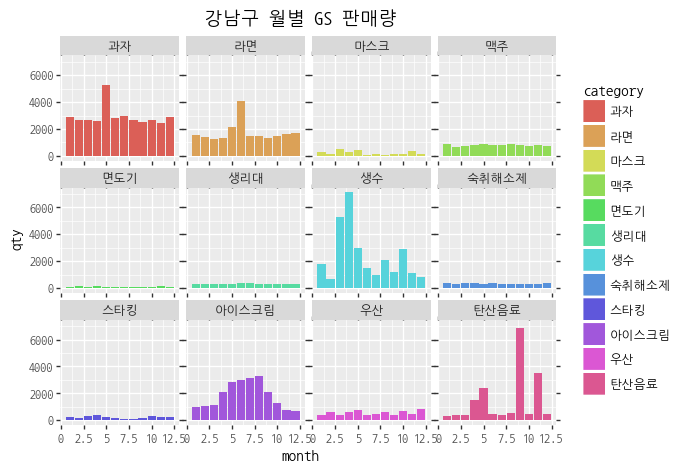

<ggplot: (131775087943)>

In [80]:
gs_total_강남 = gs_total[(gs_total['bor_nm']=='강남구')]
(ggplot(gs_total_강남) 
    +aes(x='month',y='qty',fill='category')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle(' 강남구 월별 GS 판매량 ')
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

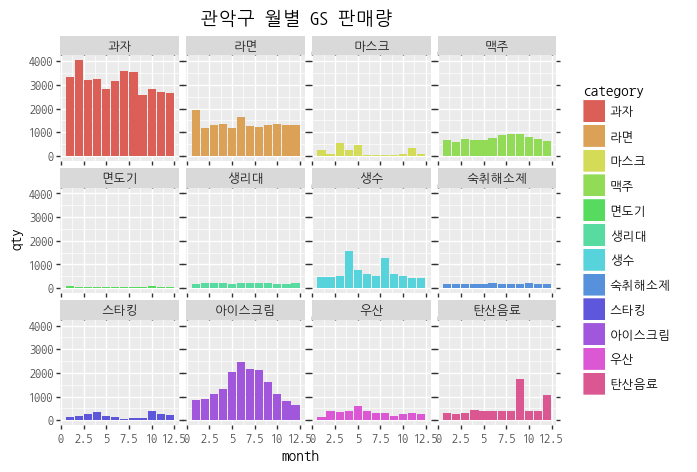

<ggplot: (-9223371905079687834)>

In [83]:
gs_total_관악 = gs_total[(gs_total['bor_nm']=='관악구')]
(ggplot(gs_total_관악) 
    +aes(x='month',y='qty',fill='category')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('관악구 월별 GS 판매량 ')
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

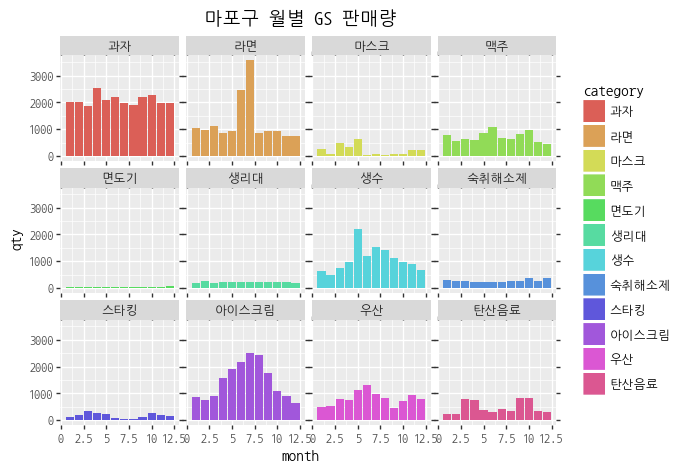

<ggplot: (131747598463)>

In [84]:
gs_total_마포 = gs_total[(gs_total['bor_nm']=='마포구')]
(ggplot(gs_total_마포) 
    +aes(x='month',y='qty',fill='category')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle(' 마포구 월별 GS 판매량 ')
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

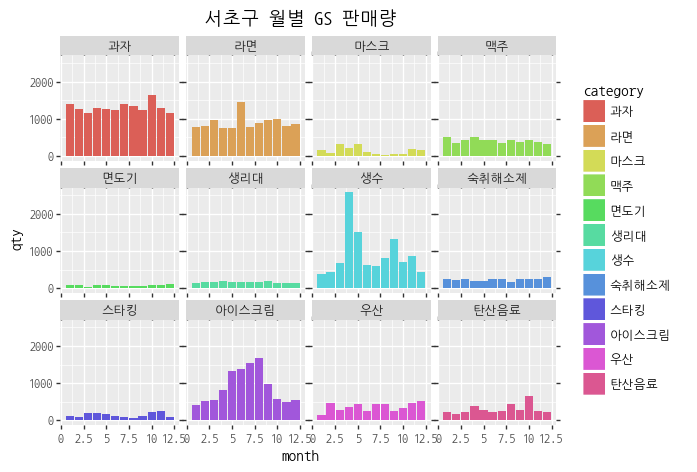

<ggplot: (131771289180)>

In [85]:
gs_total_서초 = gs_total[(gs_total['bor_nm']=='서초구')]
(ggplot(gs_total_서초) 
    +aes(x='month',y='qty',fill='category')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle(' 서초구 월별 GS 판매량 ')
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

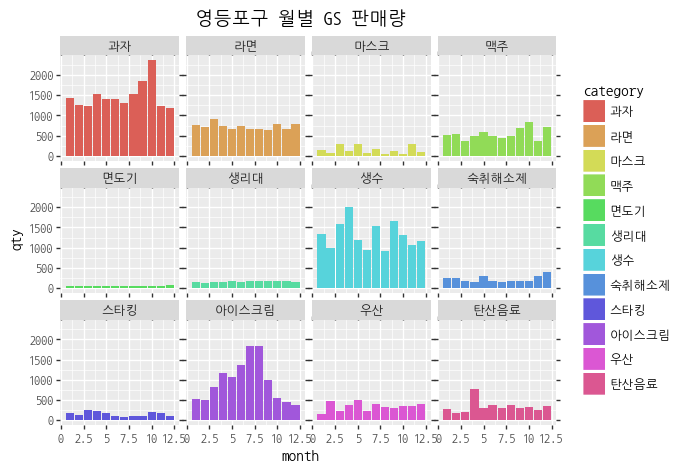

<ggplot: (131670672090)>

In [86]:
gs_total_영등포 = gs_total[(gs_total['bor_nm']=='영등포구')]
(ggplot(gs_total_영등포) 
    +aes(x='month',y='qty',fill='category')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle(' 영등포구 월별 GS 판매량 ')
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

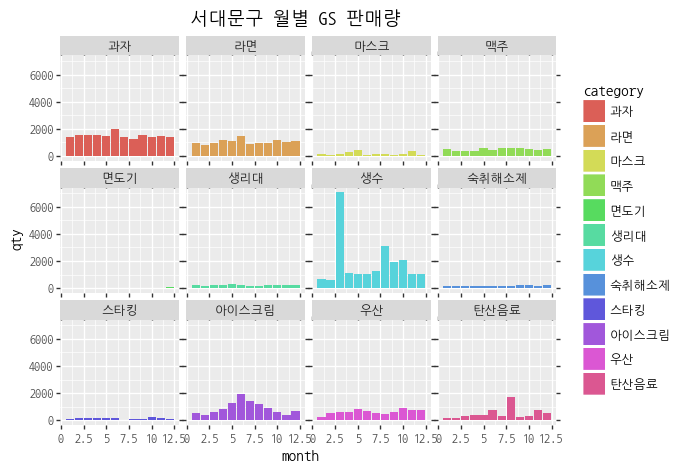

<ggplot: (131693195528)>

In [87]:
gs_total_서대문 = gs_total[(gs_total['bor_nm']=='서대문구')]
(ggplot(gs_total_서대문) 
    +aes(x='month',y='qty',fill='category')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('서대문구 월별 GS 판매량 ')
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

# 지역별 분류 분석 통계 
1. 강남구 (0 ~ 6000 판매량)
        평균 판매량기준
        1. 과자 
        2. 아이스크림 
        3. 라면 
        4. 생수
        5. 탄산음료
        
        최고 판매량 기준
        1. 생수 (4월달) 7000이상
        2. 탄산음료 (9월달) 7000
        3. 과자 (5월달) 5000이상
        4. 라면 (6월달) 5000
        5. 아이스크림 (8월달) 3000이상

2. 관악구 (0 ~ 4000 판매량)
        평균 판매량기준 
        1. 과자
        2. 아이스크림
        3. 라면 
        4. 맥주
        5. 생수 

        최고 판매량 기준
        1. 과자 (2월달) 4000
        2. 아이스크림 (6월달) 3000
        3. 라면 (1월달) 2000
        4. 탄산음료 1500이상
        5. 생수 1500

3. 마포구 (0 ~ 3000 판매량)
        평균 판매량기준 
        1. 과자
        2. 아이스크림
        3. 라면 
        4. 맥주
        5. 생수 
        6. 우산

        최고 판매량 기준
        1. 라면 (7월달) 3500이상
        2. 과자 (4월달) 2500이상
        3. 아이스크림 (7월달) 2500
        4. 생수 (5월달) 2000이상
        5. 맥주 (6월달) 1000

4. 서초구 (0 ~ 2000 판매량)
        평균 판매량기준 
        1. 과자
        2. 라면
        3. 아이스크림
        4. 생수
        5. 맥주

        최고 판매량 기준
        1. 생수 (4월달) 2500이상
        2. 아이스크림 (8월달) 2500
        3. 과자 (10월달) 1500이상
        4. 라면 (6월달) 1500
        5. 탄산음료 (10월달) 500이상


5. 영등포구 (0 ~ 2000 핀매량)
        평균 판매량기준 
        1. 과자
        2. 생수
        3. 아이스크림
        4. 라면
        5. 맥주

        최고 판매량 기준
        1. 과자 (10월달) 2250이상
        2. 생수(4월달) 2000
        3. 아이스크림(8월달) 1750이상
        4. 라면 (3월달) 750이상
        5. 맥주(10월달) 750이상


6. 서대문구 (0 ~ 6000 판매량)
        평균 판매량기준 
        1. 생수
        2. 과자
        3. 라면
        4. 아이스크림
        5. 맥주

        최고 판매량 기준
        1. 생수 (3월달) 7000
        2. 과자(6월달) 2000
        3. 아이스크림 (6월달) 2000
        4. 라면(6월달) 1500이상
        5. 탄산음료(8월달) 2000

# ====================== 성별 연령별 분류 =========================

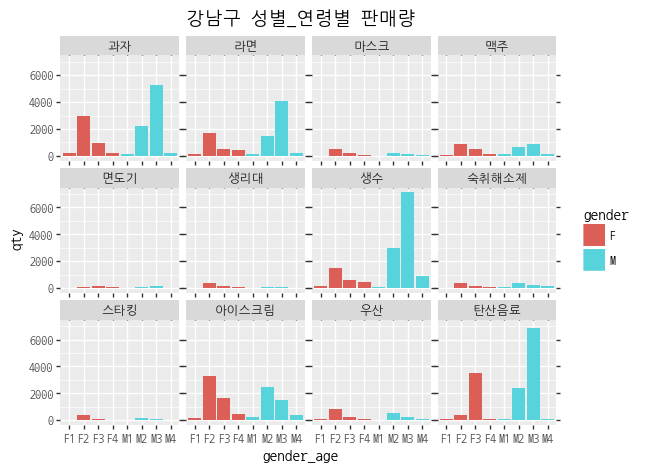

<ggplot: (131696001032)>

In [96]:
gs_total_강남 = gs_total[(gs_total['bor_nm']=='강남구')]
(ggplot(gs_total_강남) 
    +aes(x='gender_age',y='qty',fill='gender')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('강남구 성별_연령별 판매량') 
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

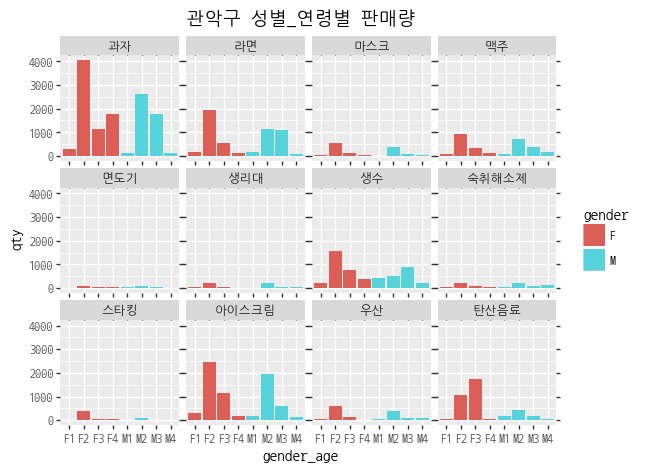

<ggplot: (-9223371905130064366)>

In [97]:
gs_total_관악 = gs_total[(gs_total['bor_nm']=='관악구')]
(ggplot(gs_total_관악) 
    +aes(x='gender_age',y='qty',fill='gender')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('관악구 성별_연령별 판매량') 
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

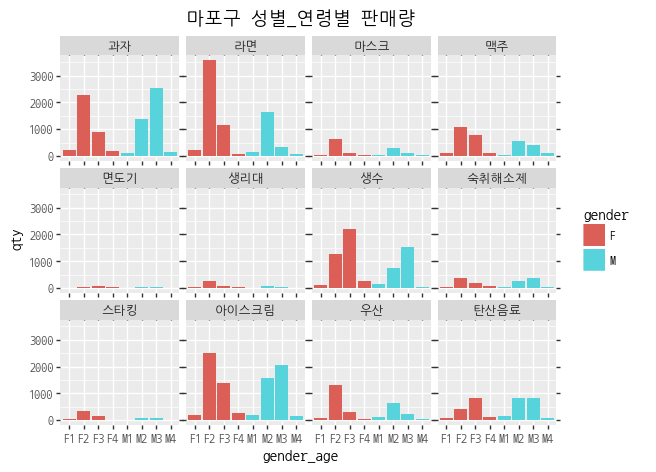

<ggplot: (131735640959)>

In [98]:
gs_total_마포 = gs_total[(gs_total['bor_nm']=='마포구')]
(ggplot(gs_total_마포) 
    +aes(x='gender_age',y='qty',fill='gender')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('마포구 성별_연령별 판매량') 
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

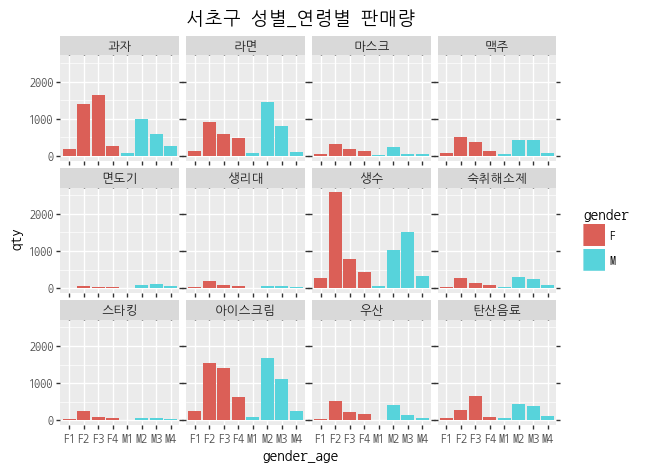

<ggplot: (131676026309)>

In [99]:
gs_total_서초 = gs_total[(gs_total['bor_nm']=='서초구')]
(ggplot(gs_total_서초) 
    +aes(x='gender_age',y='qty',fill='gender')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('서초구 성별_연령별 판매량') 
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

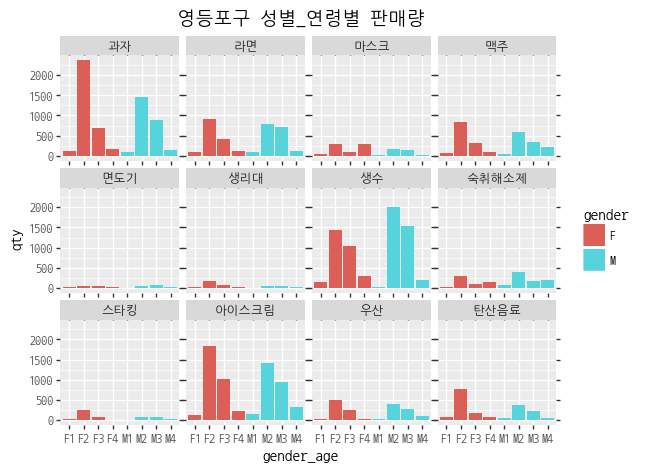

<ggplot: (-9223371905128635399)>

In [100]:
gs_total_영등포 = gs_total[(gs_total['bor_nm']=='영등포구')]
(ggplot(gs_total_영등포) 
    +aes(x='gender_age',y='qty',fill='gender')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('영등포구 성별_연령별 판매량') 
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

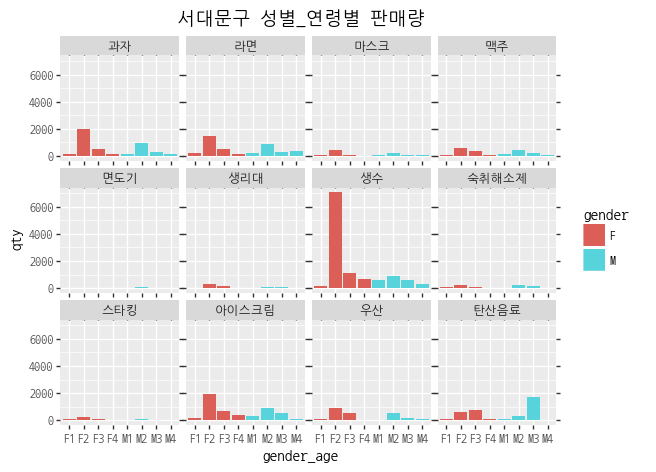

<ggplot: (-9223371905127626517)>

In [103]:
gs_total_서대문 = gs_total[(gs_total['bor_nm']=='서대문구')]
(ggplot(gs_total_서대문) 
    +aes(x='gender_age',y='qty',fill='gender')
    +geom_bar(stat='identity',position='dodge')
    +ggtitle('서대문구 성별_연령별 판매량') 
    +facet_wrap('category')
    +theme(text= element_text(family='NanumGothicCoding'))
)

# 지역별 분류 분석 통계 
1. 강남구 (0 ~ 6000 판매량)
        1.생수 여성(20~39) , 남성 (40~59)
        2.탄산음료 여성(40~59) , 남성 (40~59)
        3.과자 여성(20~39) , 남성 (40~59)
        4.아이스크림 여성(20~39) , 남성 (20~39)
        5.라면 여성(20~39) , 남성 (40~59)

2. 관악구 (0 ~ 4000 판매량)
        1.과자 여성(20~39) , 남성 (20~39)
        2.아이스크림 여성(20~39) , 남성 (20~39)
        3.라면 여성(20~39) , 남성 (20~39)
        4.생수 여성(20~39) , 남성 (40~59)
        5.탄산음료 여성(40~59) , 남성 (20~39)
        6.맥주 여성(20~39) , 남성 (20~39)

3. 마포구 (0 ~ 3000 판매량)
        1.라면 여성(20~39) , 남성 (20~39)
        2.과자 여성(20~39) , 남성 (40~59)
        3.아이스크림 여성(20~39) , 남성 (40~59)
        4.생수 여성(40~59) , 남성 (40~59)
        5.맥주 여성(20~39) , 남성 (20~39)

4. 서초구 (0 ~ 2000 판매량)
        1.생수 여성(20~39) , 남성 (40~59)
        2.아이스크림 여성(20~39) , 남성 (20~39)
        3.과자 여성(40~59) , 남성 (20~39) 
        4.라면 여성(20~39) , 남성 (20~39)

5. 영등포구 (0 ~ 2000 핀매량)
        1.과자 여성(20~39) , 남성 (20~39)
        2.생수 여성(20~39) , 남성 (20~39)
        3.아이스크림 여성(20~39) , 남성 (20~39)
        4.라면 여성(20~39) , 남성 (20~39)
        5.맥주 여성(20~39) , 남성 (20~39)

6. 서대문구 (0 ~ 6000 판매량)
        1.생수 여성(20~39) , 남성 (20~39)
        2.과자 여성(20~39) , 남성 (20~39)
        3.라면  여성(20~39) , 남성 (20~39)
        4.아이스크림 여성(20~39) , 남성 (20~39)